<h1>Converting Gray Scaled Images to Binary</h1>

Source
- [Overview | Binary Images](https://youtu.be/COxRYLrsscc)

---

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import cv2 as cv
import numpy as np

In [5]:
#Util function
def topkindex(arr, k):
    temp = []
    n = len(arr)
    if(n >= k):
        for i in range(n):
            temp.append((arr[i], i))
        temp = sorted(temp, reverse=True)[:k]
        return [x[1] for x in temp]
    return temp
# topkindex([1,2,3,10,5,6,7],2)

## The Main Idea
Basically, we want to first differentiate which one's the background and which one's the foreground. This can be done by making a histograms of all the pixels. What ends up happening usually is we'll find 2 peaks indicating the things of interest. We can take the through between the peaks as a treshold for the image.


[[151 173 206 ... 214 219 222]
 [136 138 179 ... 220 220 221]
 [ 73  58 124 ... 223 220 219]
 ...
 [195 194 192 ... 217 216 214]
 [213 213 212 ... 231 232 231]
 [231 232 233 ... 249 250 250]]


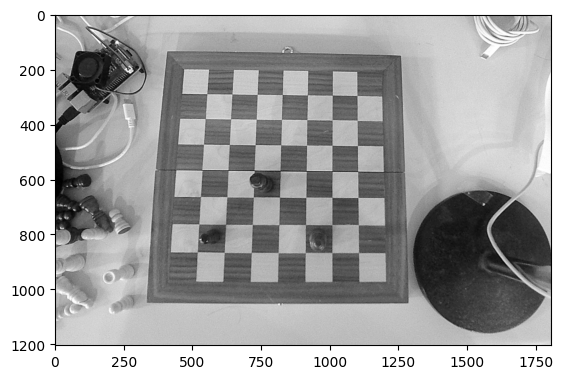

In [4]:
# Getting data
img = cv.imread("data/move1.jpg", cv.IMREAD_GRAYSCALE)

print(img) # ϵ [0,255]
plt.imshow(img, cmap="gray")

[423, 721, 747, 632, 681, 693, 666, 708, 739, 880, 958, 1070, 958, 1114, 1188, 1229, 1400, 1575, 1952, 2303, 2625, 3020, 3668, 4125, 4448, 5211, 5630, 5667, 6219, 6314, 6334, 6471, 6801, 6385, 6190, 5830, 5198, 4953, 4972, 4976, 4941, 5021, 4766, 4881, 5034, 5156, 5208, 4852, 4562, 4160, 4000, 4089, 4133, 4049, 3827, 3919, 3809, 3582, 3669, 3618, 3528, 3632, 3840, 3946, 3906, 3924, 3985, 4045, 4215, 4371, 4615, 4965, 5260, 5417, 5758, 6284, 6620, 7044, 7465, 8060, 8679, 9173, 9772, 9998, 10680, 11372, 11915, 12231, 12816, 13265, 13964, 14097, 14392, 14695, 15384, 15594, 15693, 15788, 15307, 15460, 15861, 15781, 15294, 14876, 14110, 14016, 13691, 13355, 12255, 11488, 10764, 10345, 10133, 9752, 9022, 8386, 7556, 7299, 7025, 6611, 6084, 5822, 5265, 4989, 4525, 4432, 4117, 4063, 3645, 3445, 3393, 3428, 3321, 3255, 3400, 3243, 3253, 3190, 3286, 3398, 3534, 3760, 3750, 3896, 3861, 3985, 3929, 3989, 4069, 4251, 4359, 4409, 4611, 4646, 4479, 4713, 4885, 5233, 5646, 6061, 6749, 7292, 7698, 8112

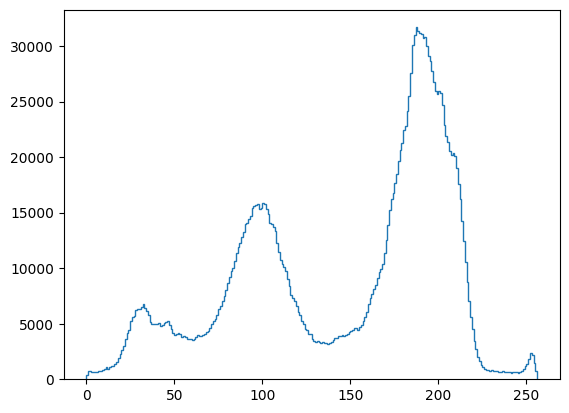

In [6]:
#Getting histogram
bucket = []
for i in range(255+1):
    bucket.append(0)

row, col = img.shape
for i in range(row):
    for j in range(col):
        bucket[img[i][j]]+=1

print(bucket)
plt.stairs(bucket)

(140, 3172.6077731093114)


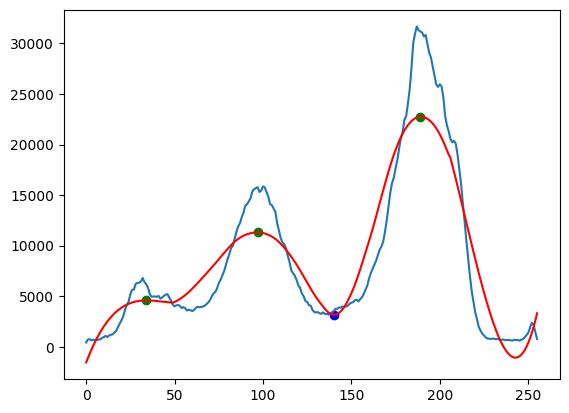

In [9]:
#Find treshold (btw, you can also just eyeball it)
import scipy.signal

yhat = scipy.signal.savgol_filter(bucket, 100, 3) # Approximating: window size 51, polynomial order 3
peaks = scipy.signal.find_peaks(yhat)[0] #Returns x values

#Getting the actual values of the peaks
peak_y = []
for p in peaks:
    peak_y.append(yhat[p]) 

#Getting the bounds for the through
indices = topkindex(peak_y, 2) #Find top 2 peaks
bounds = [x for index, x in enumerate(peaks) if index in indices]

lower_bound, upper_bound = min(bounds), max(bounds)

treshold = (lower_bound, yhat[lower_bound])
for i in range(lower_bound, upper_bound):
    val = yhat[i]
    if val<treshold[1]:
        treshold=(i, val)

print(treshold)

#Visualization stuff
plt.plot(range(256),bucket)
plt.plot(range(256),yhat, color='red')
plt.scatter(peaks, peak_y, color="green")
plt.scatter(treshold[0], treshold[1], color="blue")
plt.show()

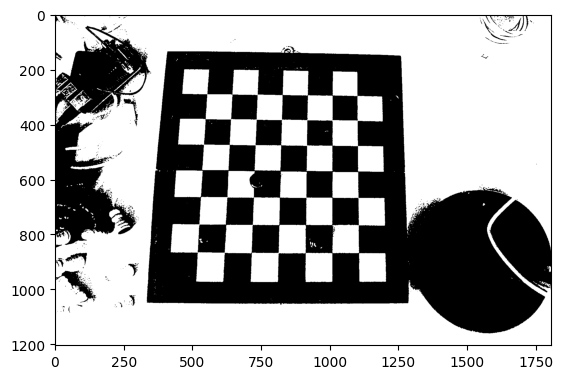

In [10]:
#Results
image = img.copy()

row, col = img.shape
for i in range(row):
    for j in range(col):
        if image[i][j]<treshold[0]:
            image[i][j] = 0
        else:
            image[i][j] = 1

plt.imshow(image, cmap="gray")
plt.imsave("data/binary_scene.jpg", image)